In [210]:
"""
██████╗  █████╗ ██████╗ ███████╗██████╗     ██████╗ ██╗      ██████╗ ████████╗
██╔══██╗██╔══██╗██╔══██╗██╔════╝██╔══██╗    ██╔══██╗██║     ██╔═══██╗╚══██╔══╝
██████╔╝███████║██████╔╝█████╗  ██████╔╝    ██████╔╝██║     ██║   ██║   ██║
██╔═══╝ ██╔══██║██╔═══╝ ██╔══╝  ██╔══██╗    ██╔═══╝ ██║     ██║   ██║   ██║
██║     ██║  ██║██║     ███████╗██║  ██║    ██║     ███████╗╚██████╔╝   ██║
╚═╝     ╚═╝  ╚═╝╚═╝     ╚══════╝╚═╝  ╚═╝    ╚═╝     ╚══════╝ ╚═════╝    ╚═╝
@Title    : 混合契约下应急物资政企三级联合储备模型研究
@Author   : GUO Keting, GONG Lingjun*
@Version  : 2024-03-30 (V4.0)
"""

'\n██████╗  █████╗ ██████╗ ███████╗██████╗     ██████╗ ██╗      ██████╗ ████████╗\n██╔══██╗██╔══██╗██╔══██╗██╔════╝██╔══██╗    ██╔══██╗██║     ██╔═══██╗╚══██╔══╝\n██████╔╝███████║██████╔╝█████╗  ██████╔╝    ██████╔╝██║     ██║   ██║   ██║\n██╔═══╝ ██╔══██║██╔═══╝ ██╔══╝  ██╔══██╗    ██╔═══╝ ██║     ██║   ██║   ██║\n██║     ██║  ██║██║     ███████╗██║  ██║    ██║     ███████╗╚██████╔╝   ██║\n╚═╝     ╚═╝  ╚═╝╚═╝     ╚══════╝╚═╝  ╚═╝    ╚═╝     ╚══════╝ ╚═════╝    ╚═╝\n@Title    : 混合契约下应急物资政企三级联合储备模型研究\n@Author   : GUO Keting, GONG Lingjun\n@Version  : 2024-03-26 (V3.0)\n'

In [211]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots  # noqa: F401
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator

# initial settings
plt.style.use(["science", "no-latex"])
%config InlineBackend.figure_format = "svg"

In [212]:
# Grid data X, Y and meshgrid. X -> \rho, Y -> c2
X, Y = np.meshgrid(np.linspace(0.6, 1, 30), np.linspace(50, 250, 30))

# Set parameter values
U, MU = 20000, 10000
HG, H0, H1 = 12, 10, 5
C0, C1 = 25, 30
G0, G = 20, 25
V, S = 8, 5
O = 10  # noqa: E741
W, E, M = 150, 300, 400

# Calculate the values for Qg, qm, qs, Qa, and qa
Qg = U * (1 - (W + HG - V) / (X * (E - V)))
qm = U * (1 - (C1 + H0 + G0 - V - O) / (X * (Y + G - V))) - Qg
qs = U * (1 - (C0 + H1 - S - O) / (X * (Y - S))) - qm - Qg
Qa = U * (1 - (W + HG - V) / (X * (E - V)))
qa = U * (1 - (C1 + G0 + H0 - V) / (X * (E - V))) - Qa

benchmark_cost_g = (W + HG - V + X * V) * Qa + X * (
    (-V * (Qa**2)) / (2 * U)
    - E * (((Qa + qa) ** 2 - Qa**2) / (2 * U))
    + E * qa
    + M * (MU - Qa - qa + ((Qa + qa) ** 2) / (2 * U))
)
mainmodel_cost_g = (
    Qg * (W + HG - V)
    + X * V * Qg
    + X
    * (
        (-V * (Qg**2)) / (2 * U)
        + E * (qm + qs)
        - E * (((Qg + qm + qs) ** 2 - Qg**2) / (2 * U))
        + M * (MU - Qg - qm - qs + ((Qg + qm + qs) ** 2) / (2 * U))
    )
)
Z = mainmodel_cost_g - benchmark_cost_g

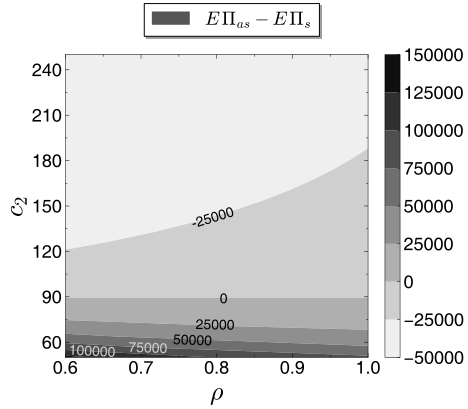

In [271]:
# Create the figure and axes objects
fig = plt.figure(figsize=(6.7, 6))
ax = plt.subplot(111)

# Plot
CS = ax.contourf(X, Y, Z, cmap=plt.get_cmap("gray_r"))

ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(30))
ax.yaxis.set_minor_locator(MultipleLocator(15))
ax.tick_params(which="major", length=4)
ax.tick_params(which="minor", length=2)
ax.set_xlabel("$\\rho$", size=26)
ax.set_ylabel("$c_2$", size=26)
ax.tick_params(labelsize=18)

ax.annotate("-25000", fontsize=14, xy=(0.765, 135.3), rotation=17)
ax.annotate("0", fontsize=14, xy=(0.804, 85.8), rotation=0)
ax.annotate("25000", fontsize=14, xy=(0.772, 68.3), rotation=-1)
ax.annotate("50000", fontsize=14, xy=(0.742, 57.9), rotation=-2)
ax.annotate("75000", fontsize=14, xy=(0.683, 52.8), rotation=-2, color="#cfcfcf")
ax.annotate("100000", fontsize=14, xy=(0.604, 50.3), rotation=-3, color="#cfcfcf")

# Color bar
cbar = fig.colorbar(CS, fraction=0.045, pad=0.05)
cbar.ax.tick_params(labelsize=18)

# legend
colors = ["#555555"]
legend_labels = ["$E\,\\Pi_{as}-E\,\\Pi_s$"]
legend_handles = [Rectangle((0, 0), 1, 1, fc=color) for color in colors]
ax.legend(
    handles=legend_handles,
    labels=legend_labels,
    fontsize=20,
    frameon=True,
    fancybox=False,
    shadow=True,
    edgecolor="black",
    loc="upper center",
    bbox_to_anchor=(0.55, 1.2),
)

# Show
ax.set_box_aspect(1)
fig.tight_layout()
plt.show()